In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [3]:
#read the dataset
df = pd.read_excel('../dataset/regression_data.xls')

# Explore

In [4]:
#have a look at the data - limit to 5
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
#look at the data with ALL columns (in the above example we miss some columns)
pd.set_option('display.max_columns', None)
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
#see just column names
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [6]:
#see amount of rows & columns
df.shape

(21597, 21)

In [7]:
#information about a DataFrame including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [8]:
#double check nan-values
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [9]:
#view the basic statistical details (count, max, min, percentile, mean, std)
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [10]:
#check data types for each column
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [11]:
#use a function to see data type | example | columns – decide which to explore in deatil for cleaning
def check_dtypes(dataframe):
    dtype = dataframe.dtypes
    x=0
    for i in range (len(dataframe.columns)):
        print(dtype[x]," ", dataframe.iloc[0][dataframe.columns[i]]," ",dataframe.columns[i])
        x+=1
    return()

In [12]:
#call function and see one example per column with dtype
check_dtypes(df)

int64   7129300520   id
datetime64[ns]   2014-10-13 00:00:00   date
int64   3   bedrooms
float64   1.0   bathrooms
int64   1180   sqft_living
int64   5650   sqft_lot
float64   1.0   floors
int64   0   waterfront
int64   0   view
int64   3   condition
int64   7   grade
int64   1180   sqft_above
int64   0   sqft_basement
int64   1955   yr_built
int64   0   yr_renovated
int64   98178   zipcode
float64   47.5112   lat
float64   -122.257   long
int64   1340   sqft_living15
int64   5650   sqft_lot15
int64   221900   price


()

# Cleaning and preparing

In [13]:
#seems like yr_renovated contains "0" values
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# get percentage of unique values in the data frame
df['yr_renovated'].value_counts() / len(df) *100

0       95.767931
2014     0.421355
2013     0.171320
2003     0.166690
2005     0.162060
          ...    
1951     0.004630
1959     0.004630
1948     0.004630
1954     0.004630
1944     0.004630
Name: yr_renovated, Length: 70, dtype: float64

In [15]:
#drop yr_renovated because 95% of the date equals "0"
#also drop latitude longitude because we have zipcode
df = df.drop(['yr_renovated', 'lat', 'long'], axis=1)

In [16]:
#show columns do see if yr_renovated is dropped
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'price'],
      dtype='object')

In [17]:
#Getting the age of the properties by substracting yr_built from date

In [18]:
#1. converting yr_built to dateformat
df['yr_built'] = pd.to_datetime(df.yr_built, format='%Y')
df['yr_built'].head()

0   1955-01-01
1   1951-01-01
2   1933-01-01
3   1965-01-01
4   1987-01-01
Name: yr_built, dtype: datetime64[ns]

In [19]:
#1. substract it from date to get the age of the properties in days
df['property_age'] = df['date'] - df['yr_built']
df['property_age']

0       21835 days
1       23353 days
2       30005 days
3       18239 days
4       10275 days
           ...    
21592    1966 days
21593     418 days
21594    1999 days
21595    4033 days
21596    2479 days
Name: property_age, Length: 21597, dtype: timedelta64[ns]

In [20]:
#transform dtype timedelta64 for property_age to integer to use it for the model
df['property_age'] = df['property_age'].dt.days.astype('int')

In [21]:
#check the data for property_age
df['property_age'].head()

0    21835
1    23353
2    30005
3    18239
4    10275
Name: property_age, dtype: int64

In [22]:
#now drop date and yr_built because property_age is more meaningful
df = df.drop(['date', 'yr_built'], axis=1)

In [23]:
#check if date and yr_built was dropped and property_age added
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price',
       'property_age'],
      dtype='object')

In [24]:
#check current data frame
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,property_age
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,21835
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,23353
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,180000,30005
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,18239
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,10275


In [25]:
#final check: check if there are any duplicates on properties
#sort by ID and price
df[df.duplicated(['id'], keep=False)].sort_values(['id', 'price'])

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,property_age
2494,1000102,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,98002,2060,7316,280000,8659
2495,1000102,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,98002,2060,7316,300000,8877
16800,7200179,2,1.00,840,12750,1.0,0,0,3,6,840,0,98055,1480,6969,150000,32795
16801,7200179,2,1.00,840,12750,1.0,0,0,3,6,840,0,98055,1480,6969,175000,32985
11421,109200390,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,98023,1830,6956,245000,12650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,9828200460,2,1.00,700,4800,1.0,0,0,3,7,700,0,98122,1440,4800,430000,33973
15185,9834200305,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,98144,1360,4080,350000,40374
15186,9834200305,3,1.00,1790,3876,1.5,0,0,5,7,1090,700,98144,1360,4080,615000,40583
1084,9834200885,4,2.50,2080,4080,1.0,0,0,5,7,1040,1040,98144,1340,4080,360000,19190


In [26]:
#the only difference is the price. As we want to precict the price we should drop old sales 
# from the duplicates and keep just the current sales. We drop based on 'date' - yr_built -> that column
# is called "property_age"

In [27]:
#first create a data frame wiht NO duplicates called no_duplicates
no_duplicates = df[~df.duplicated(['id'])]

In [28]:
no_duplicates.shape

(21420, 17)

In [29]:
#second create a data frame with duplicates and keep just the latest sales
df_duplicates = df[df.duplicated(['id'], keep='first')].sort_values(['id', 'price'])

In [30]:
df_duplicates.shape

(177, 17)

In [31]:
#concat both we should end up with 21,597 rows
df_latest_sales = pd.concat([no_duplicates, df_duplicates], axis=0)

In [32]:
df_latest_sales.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,property_age
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,21835
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,23353
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,180000,30005
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,18239
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,10275


In [33]:
df_latest_sales.shape

(21597, 17)

In [34]:
## AWESOME -> concatination worked :D

In [35]:
#change index to id
df_latest_sales = df_latest_sales.set_index('id')

In [36]:
#check if it changed
df_latest_sales.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,property_age
id,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,21835
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,23353
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,180000,30005
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,18239
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,10275


In [37]:
#change zipcode to string to get it as categoricol for our model
df_latest_sales = df_latest_sales.astype({"zipcode": str})

In [38]:
#see if zipcode is categorical (object) now
df_latest_sales.zipcode.dtype

dtype('O')

# Check distribution by plotting

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


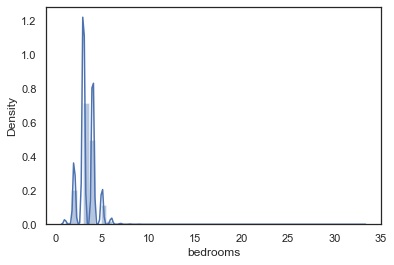

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


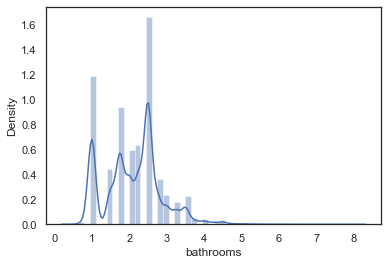

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


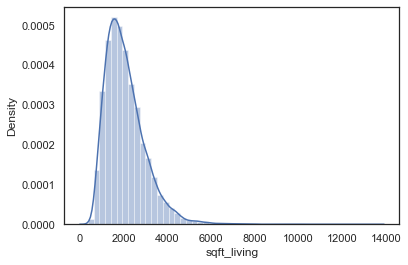

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


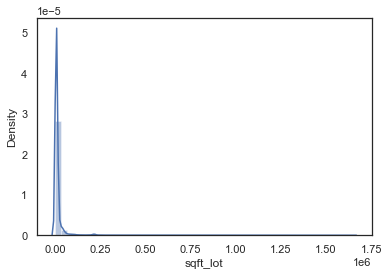

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


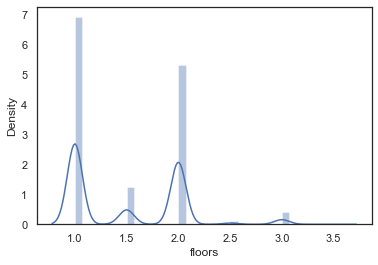

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


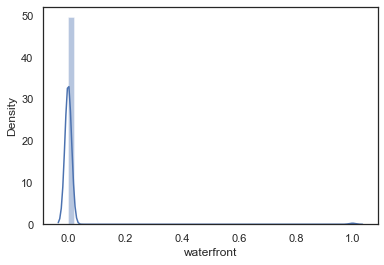

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


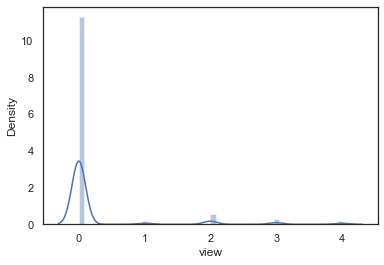

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


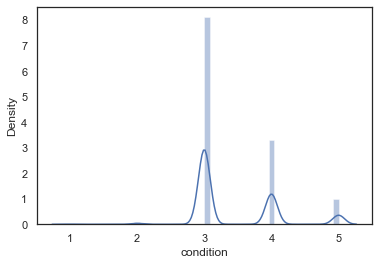

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


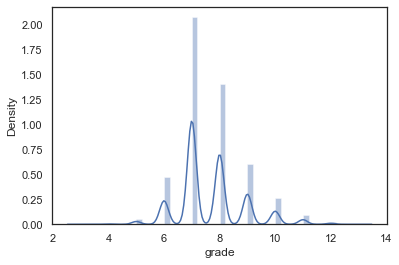

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


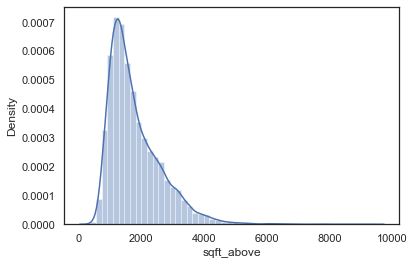

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


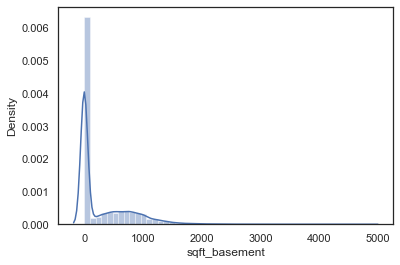

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


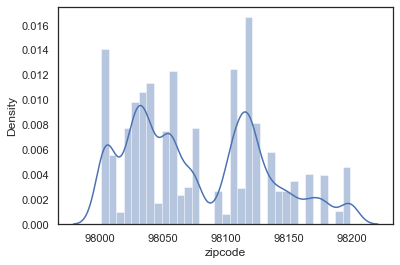

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


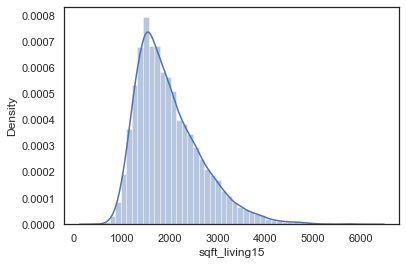

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


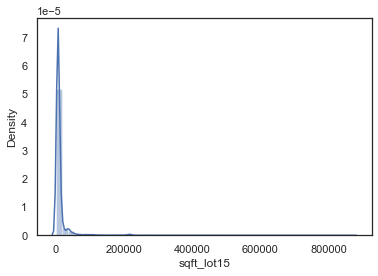

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


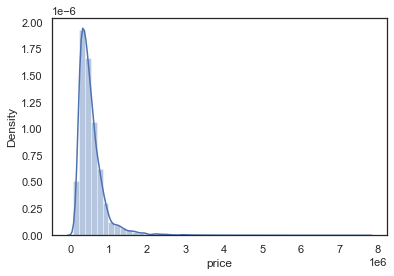

/Users/Xaver/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


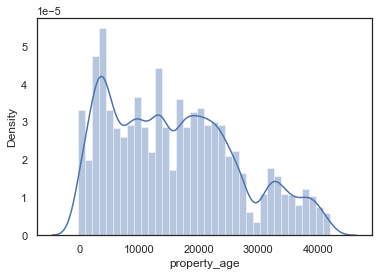

In [39]:
#see distribution with seaborn
for column in df_latest_sales:
    sns.distplot(df_latest_sales[column])
    plt.show()

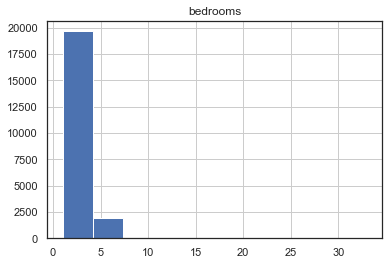

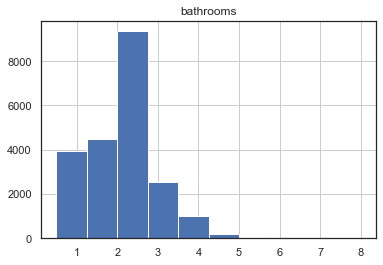

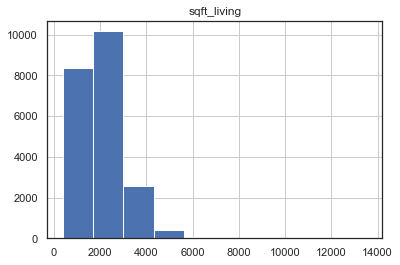

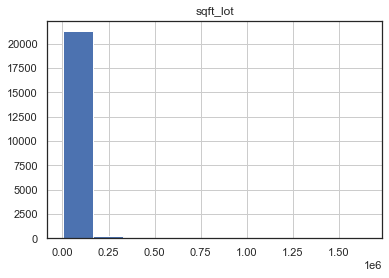

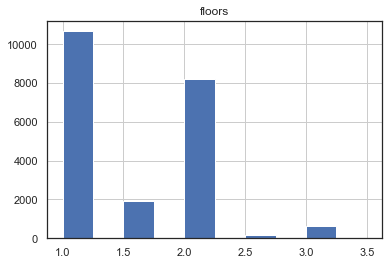

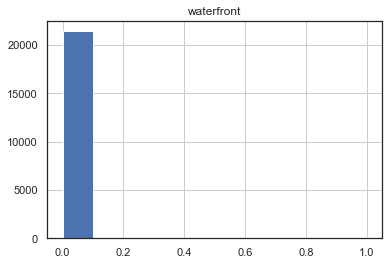

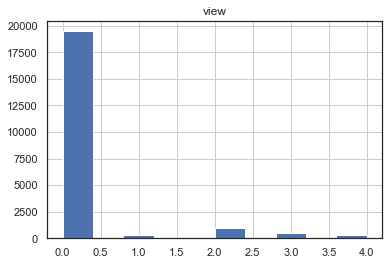

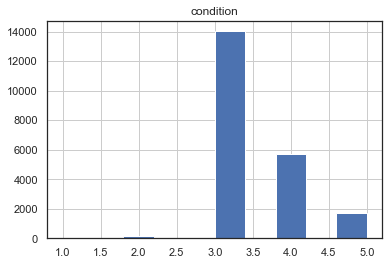

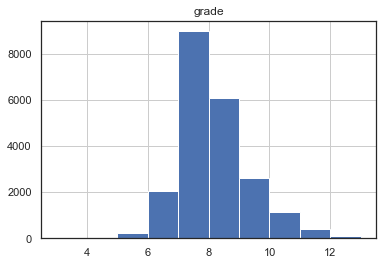

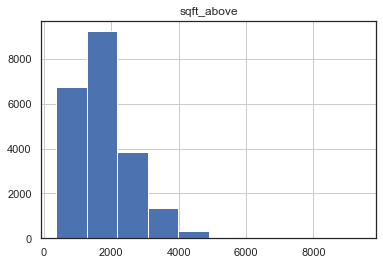

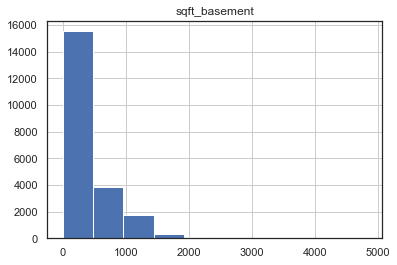

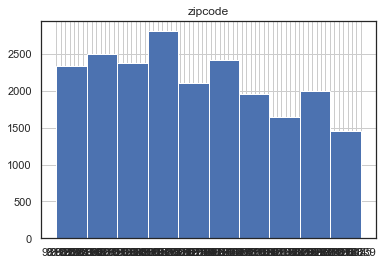

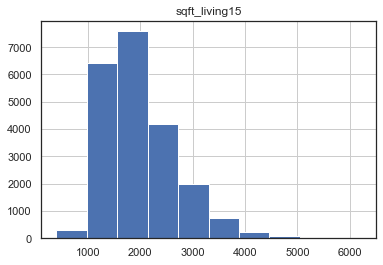

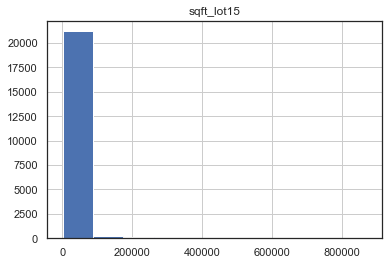

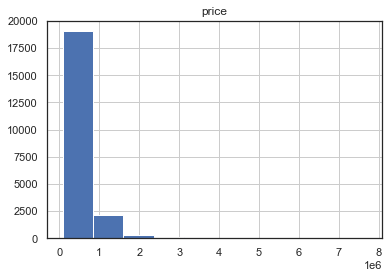

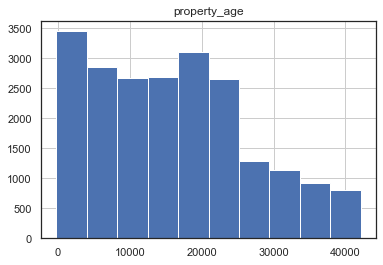

In [40]:
#see distribution with matplotlib
for column in df_latest_sales:
    df_latest_sales[column].hist()
    plt.title(column)
    plt.show()

In [41]:
# In the seaborn plots we saw that there are a lot of outliers.
# We'll double check with Boxplot in the next step

KeyError: "None of [Index(['zipcode'], dtype='object')] are in the [columns]"

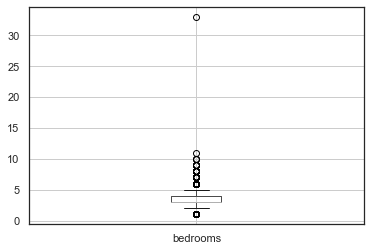

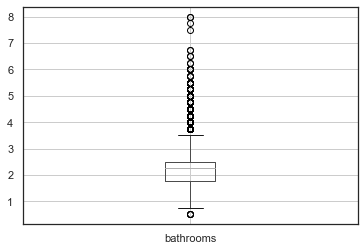

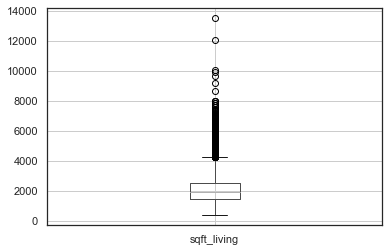

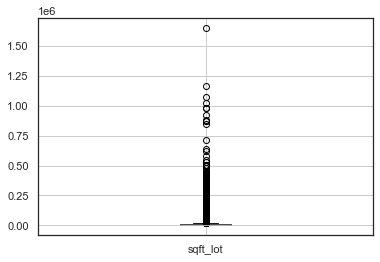

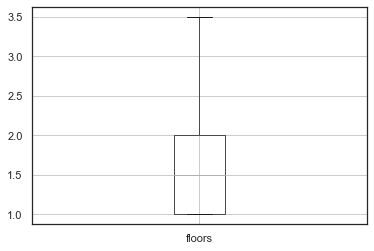

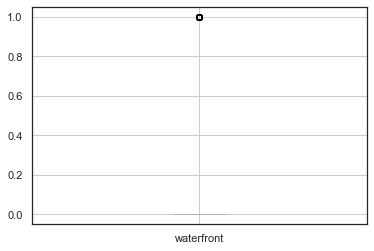

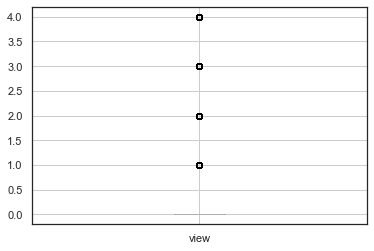

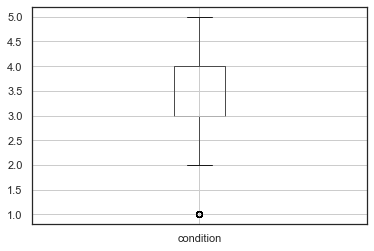

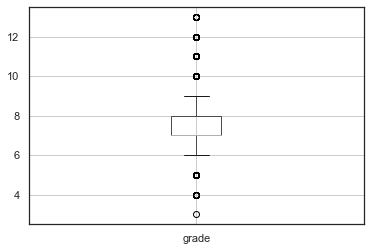

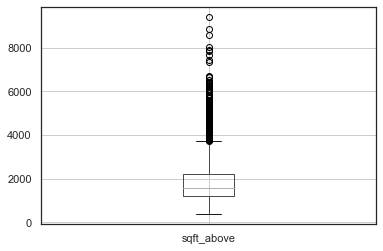

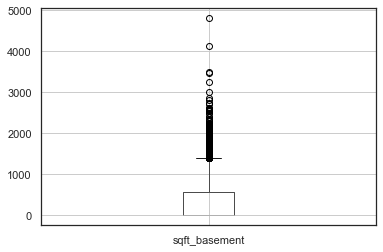

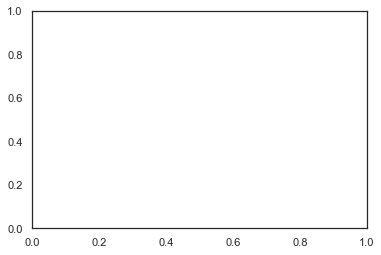

In [42]:
#plot boxplot to see outliers
for col in df_latest_sales:
    df_latest_sales.boxplot([col])
    plt.figure()

<AxesSubplot:>

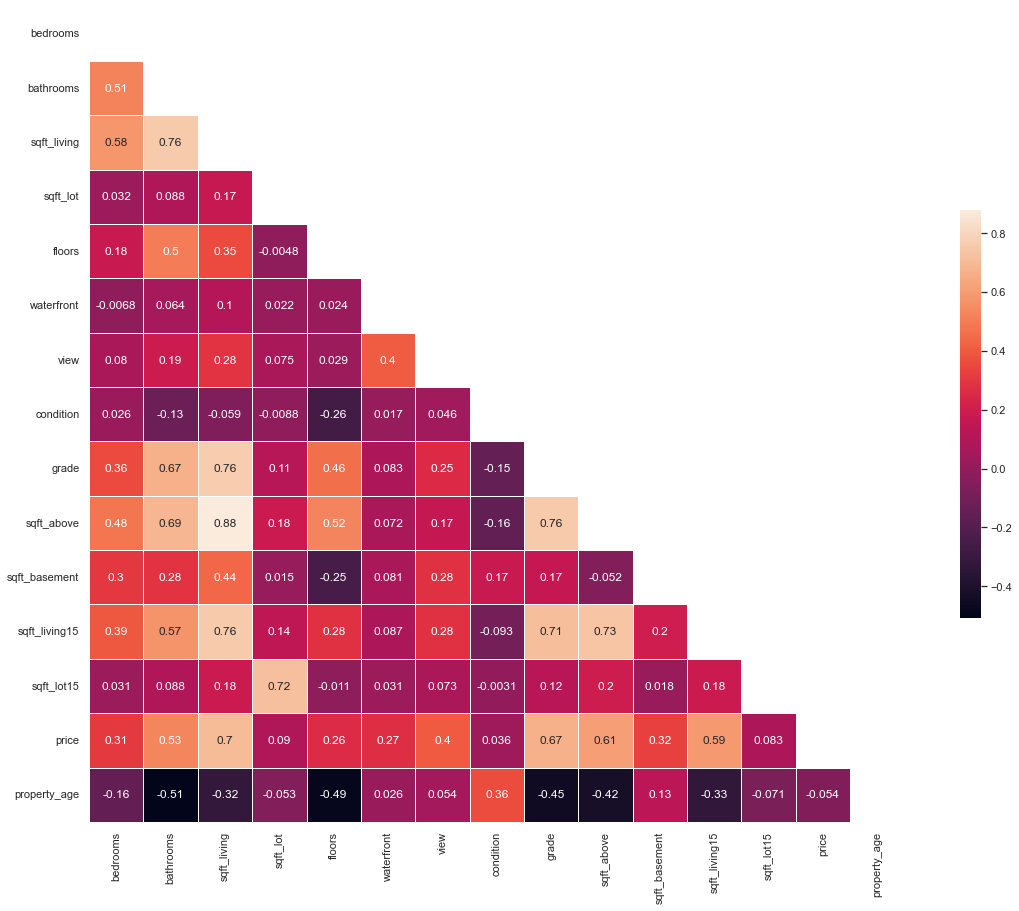

In [43]:
#see correlations
# Compute the correlation matrix
corr = df_latest_sales.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# split dataframe in categorical and numerical

In [44]:
# get numericals
numericals = df_latest_sales.select_dtypes(np.number)

In [45]:
#normalize numericals with MinMaxScaler to Normalize numerical data
transformer = MinMaxScaler().fit(numericals) 
x_minmax = transformer.transform(numericals)
print(x_minmax.shape)

(21597, 15)


In [46]:
numericals_norm = pd.DataFrame(x_minmax,index=numericals.index,columns=numericals.columns)

In [47]:
numericals_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,property_age
id,,,,,,,,,,,,,,,
7129300520,0.06250,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.161934,0.005742,0.018880,0.520798
6414100192,0.06250,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.222165,0.008027,0.060352,0.556634
5631500400,0.03125,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.399415,0.008513,0.013382,0.713669
2487200875,0.09375,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.165376,0.004996,0.069011,0.435907
1954400510,0.06250,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.241094,0.007871,0.056678,0.247899


In [48]:
# get categoricals
categorical = df_latest_sales.select_dtypes(object)
categorical.head()

,zipcode
id,
7129300520,98178
6414100192,98125
5631500400,98028
2487200875,98136
1954400510,98074


In [49]:
# Convert categorical variable into dummy/indicator variables with get_dummies
cat_encoded = pd.get_dummies(categorical, drop_first=True)
cat_encoded.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6414100192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5631500400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2487200875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1954400510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
#concat encoded categoricals and norm numericals
df_model = pd.concat([cat_encoded,numericals], axis=1)

In [51]:
#see rows and columns for df_model
df_model.shape

(21597, 84)

In [52]:
# Split the target for the supervised machine learing process

In [53]:
#Split out the target for the Test-Train
y = df_model['price']
X = df_model.drop(['price'], axis=1)
X.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,property_age
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,21835
6414100192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23353
5631500400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,30005
2487200875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,18239
1954400510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,10275


In [54]:
#Split in train and test sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Linear Regression

In [56]:
#Apply linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [57]:
lm = LinearRegression()

In [58]:
lm = model.score(X_test,y_test)

In [59]:
lm

0.8079423692276346

In [60]:
## Predict on test data
predictions = model.predict(X_test)
predictions.shape

(6480,)

In [61]:
## Evaluate the model
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.8079423692276346, 152304.4524919864, 23196646248.88374)

In [62]:
#see results
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.8079423692276346
RMSE =  152304.4524919864
MSE =  23196646248.88374
MAE =  95901.13362601941


# KNN Model

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
scores = []
for i in range(2,15): 
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    scores.append(knn_model.score(X_test, y_test))

Text(0, 0.5, 'R2')

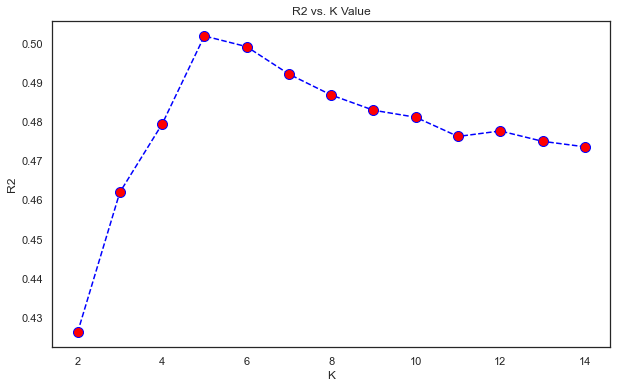

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

As we see in above figure after k=11 the fluctuation in error rate is not much. Hence whenever we will see the threshold value after which k-value is not fluctuating more we will select that specific threshold value as k value.

In [70]:
knn_model = KNeighborsRegressor(n_neighbors=11)

knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

In [71]:
r2_KNN = r2_score(y_test, knn_predictions)
RMSE_KNN = mean_squared_error(y_test, knn_predictions, squared=False)
MSE_KNN = mean_squared_error(y_test, knn_predictions)
MAE_KNN = mean_absolute_error(y_test, knn_predictions)
print("r2 for KNN = ", r2_KNN)
print("RMSE for KNN = ", RMSE_KNN)
print("MSE for KNN = ", MSE_KNN)
print("MAE for KNN = ", MAE_KNN)

r2 for KNN =  0.47631386472734594
RMSE for KNN =  251496.73668298704
MSE for KNN =  63250608562.19173
MAE for KNN =  150974.7867845118


In [ ]:
# we choose the LinearRegression Model for production
# Because we have the highest R2 and the lowest: RMSE, MSE, MAE